In [1]:
from post_analysis_clustering.utils import timer

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from post_analysis_clustering.plot_profile import prep_dist, prep_frequency_feature, plot_feature_distributions

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()

# Create DataFrame with features and target
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

# Optional: map numeric species to string labels
df_iris['species_name'] = df_iris['species'].map(dict(zip(range(3), iris.target_names)))

# Show the first few rows
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


In [5]:
df_iris = df_iris.reset_index(names='id')

In [6]:
df_iris

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,0,5.1,3.5,1.4,0.2,0,setosa
1,1,4.9,3.0,1.4,0.2,0,setosa
2,2,4.7,3.2,1.3,0.2,0,setosa
3,3,4.6,3.1,1.5,0.2,0,setosa
4,4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2,virginica
146,146,6.3,2.5,5.0,1.9,2,virginica
147,147,6.5,3.0,5.2,2.0,2,virginica
148,148,6.2,3.4,5.4,2.3,2,virginica


In [7]:
df_iris.drop(columns=['id','species','species_name'],axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
all_df, segment_dfs = prep_dist(raw_df=df_iris, 
                features = df_iris.drop(columns=['id','species','species_name'],axis=1).columns.to_list() , 
                primary_key= 'id', 
                target_cluster = 'species')
df_dict_all = {'all segment': all_df}
df_dict_0 = {'segment 0' : segment_dfs[0]}
df_dict_1 =  {'segment 1' : segment_dfs[1]}
df_dict_2 =  {'segment 2' : segment_dfs[2]}

Processing segment 0
Processing segment 1
Processing segment 2
Execution time for prep_dist: 0.0041 seconds


In [9]:
all_df

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3
146,146,6.3,2.5,5.0,1.9
147,147,6.5,3.0,5.2,2.0
148,148,6.2,3.4,5.4,2.3


Execution time for prep_frequency_feature: 0.0027 seconds
Execution time for prep_frequency_feature: 0.0025 seconds
Execution time for prep_frequency_feature: 0.0026 seconds
Execution time for prep_frequency_feature: 0.0027 seconds


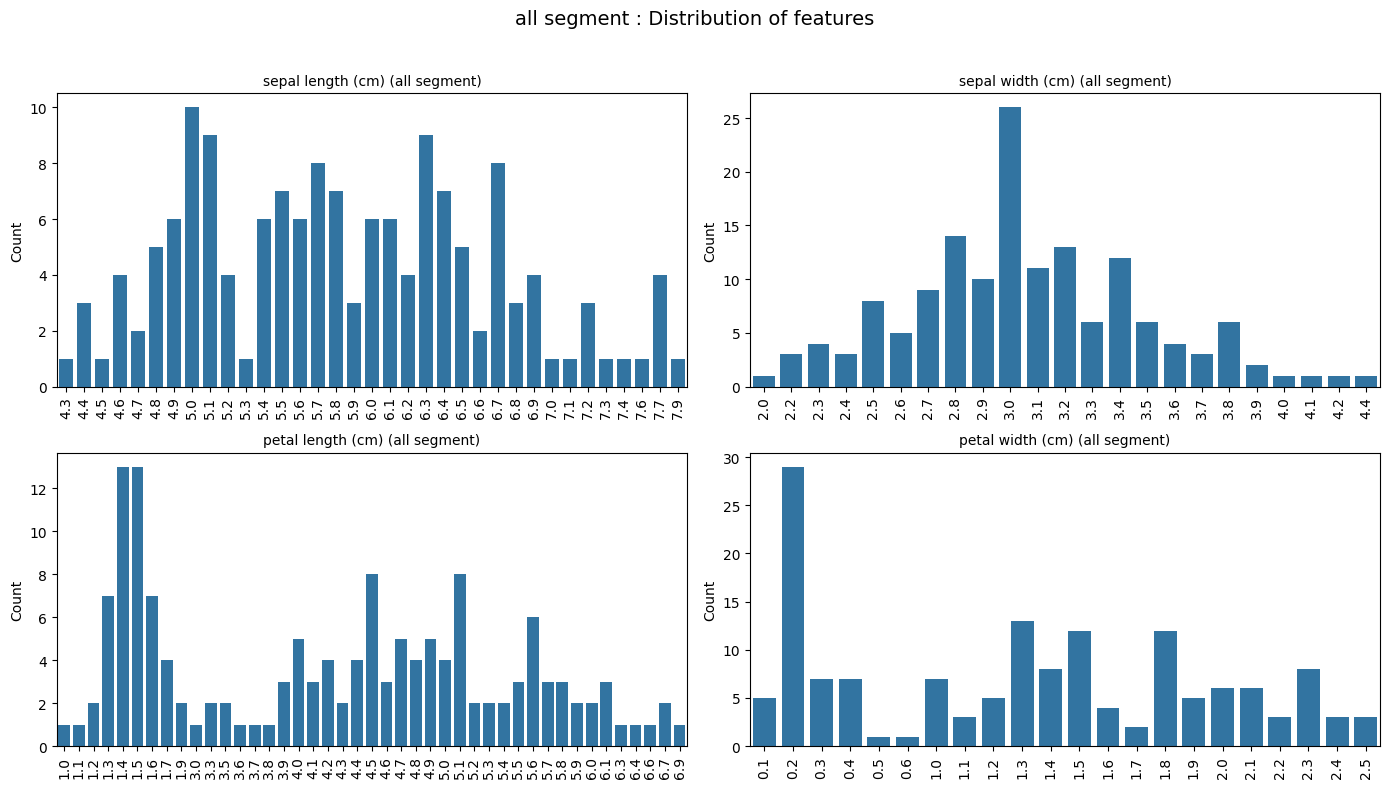

Execution time for plot_feature_distributions: 1.3186 seconds


In [10]:
plot_feature_distributions(
    df_dict=df_dict_all,
    features= df_iris.drop(columns=['id','species','species_name'],axis=1).columns.to_list(),
    primary_key='id',
    # binning_keywords=['BENE','PREMIUM'],  # or None
    n_bins=10
)

In [11]:
iris_feature_list = df_iris.drop(columns=['id','species','species_name'],axis=1).columns.to_list()
iris_feature_list

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
from post_analysis_clustering.lean_feature import *

In [13]:
binary_df = prep_binary_class(df=df_iris, features=iris_feature_list, target_cluster='species_name')
binary_df

Execution time for prep_binary_class: 0.0024 seconds


,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name,is_cluster_setosa,is_cluster_versicolor,is_cluster_virginica
0,0,5.1,3.5,1.4,0.2,0,setosa,1,0,0
1,1,4.9,3.0,1.4,0.2,0,setosa,1,0,0
2,2,4.7,3.2,1.3,0.2,0,setosa,1,0,0
3,3,4.6,3.1,1.5,0.2,0,setosa,1,0,0
4,4,5.0,3.6,1.4,0.2,0,setosa,1,0,0
...,...,...,...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2,virginica,0,0,1
146,146,6.3,2.5,5.0,1.9,2,virginica,0,0,1
147,147,6.5,3.0,5.2,2.0,2,virginica,0,0,1
148,148,6.2,3.4,5.4,2.3,2,virginica,0,0,1


In [12]:
from post_analysis_clustering.lean_feature import *

In [14]:
type(iris_feature_list)

list

In [15]:
importance_cluster0_df = cal_imp_one_binary_class(df=df_iris, 
                         features=iris_feature_list, 
                         target_cluster='species_name', 
                         focus_segment='setosa')
importance_cluster0_df

Execution time for prep_binary_class: 0.0020 seconds

Training Decision Tree...
Execution time for calculate_permutation_importance: 0.0804 seconds
Execution time for train_and_evaluate_model: 0.2030 seconds

Training Random Forest...
Execution time for calculate_permutation_importance: 0.3665 seconds
Execution time for train_and_evaluate_model: 0.5295 seconds

Training HistGradientBoosting...
Execution time for calculate_permutation_importance: 0.1291 seconds
Execution time for train_and_evaluate_model: 0.2016 seconds

Training Logistic Regression...
Execution time for calculate_permutation_importance: 0.0972 seconds
Execution time for train_and_evaluate_model: 0.1207 seconds

Training Logistic Regression (L1)...
Execution time for calculate_permutation_importance: 0.0741 seconds
Execution time for train_and_evaluate_model: 0.0877 seconds

Training Naive Bayes...
Execution time for calculate_permutation_importance: 0.0754 seconds
Execution time for train_and_evaluate_model: 0.0874 sec

,Feature,Decision Tree,Random Forest,HistGradientBoosting,Logistic Regression,Logistic Regression (L1),Naive Bayes
0,petal length (cm),0.446667,0.066667,0.446667,0.44,0.446667,0.223333
1,petal width (cm),0.000000,0.040000,0.000000,0.00,0.000000,0.223333
2,sepal length (cm),0.000000,0.000000,0.000000,0.00,0.000000,0.030000
3,sepal width (cm),0.000000,0.000000,0.000000,0.00,0.000000,0.000000


In [16]:
prep_rank_importance(importance_cluster0_df)

Execution time for prep_rank_importance: 0.0056 seconds


,Feature,variable,value,rank
0,petal length (cm),Decision Tree,0.446667,1
1,petal width (cm),Decision Tree,0.000000,2
2,sepal length (cm),Decision Tree,0.000000,2
3,sepal width (cm),Decision Tree,0.000000,2
4,petal length (cm),Random Forest,0.066667,1
5,petal width (cm),Random Forest,0.040000,2
6,sepal length (cm),Random Forest,0.000000,3
7,sepal width (cm),Random Forest,0.000000,3
8,petal length (cm),HistGradientBoosting,0.446667,1
9,petal width (cm),HistGradientBoosting,0.000000,2


In [17]:
pivot_rank_importance(importance_cluster0_df, n_rank=5)

Execution time for prep_rank_importance: 0.0052 seconds
Execution time for pivot_rank_importance: 0.0120 seconds


rank,1,2,3
Feature,,,
petal length (cm),6,0,0
petal width (cm),1,5,0
sepal length (cm),0,5,1
sepal width (cm),0,4,2


In [18]:
from post_analysis_clustering.lean_feature import *

In [19]:
final_imp,final_pvt_imp_score = cal_imp_all_binary_class(df=df_iris, 
                                                        features=iris_feature_list, 
                                                        target_cluster='species_name',
                                                        n_rank=5)

Processing segment setosa
Execution time for prep_binary_class: 0.0025 seconds

Training Decision Tree...
Execution time for calculate_permutation_importance: 0.0779 seconds
Execution time for train_and_evaluate_model: 0.0917 seconds

Training Random Forest...
Execution time for calculate_permutation_importance: 0.3537 seconds
Execution time for train_and_evaluate_model: 0.5170 seconds

Training HistGradientBoosting...
Execution time for calculate_permutation_importance: 0.1230 seconds
Execution time for train_and_evaluate_model: 0.1905 seconds

Training Logistic Regression...
Execution time for calculate_permutation_importance: 0.0960 seconds
Execution time for train_and_evaluate_model: 0.1203 seconds

Training Logistic Regression (L1)...
Execution time for calculate_permutation_importance: 0.0740 seconds
Execution time for train_and_evaluate_model: 0.0872 seconds

Training Naive Bayes...
Execution time for calculate_permutation_importance: 0.0762 seconds
Execution time for train_and_

In [20]:
final_imp

,Feature,Decision Tree,Random Forest,HistGradientBoosting,Logistic Regression,Logistic Regression (L1),Naive Bayes,Segment
0,petal length (cm),0.446667,0.066667,0.446667,0.440000,0.446667,0.223333,setosa
1,petal width (cm),0.000000,0.040000,0.000000,0.000000,0.000000,0.223333,setosa
2,sepal length (cm),0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,setosa
3,sepal width (cm),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,setosa
4,petal length (cm),0.306667,0.126667,0.350000,0.163333,0.010000,0.180000,versicolor
5,petal width (cm),0.156667,0.146667,0.123333,0.183333,0.156667,0.236667,versicolor
6,sepal length (cm),0.000000,0.000000,0.000000,0.010000,0.036667,0.023333,versicolor
7,sepal width (cm),0.000000,0.000000,0.000000,0.120000,0.123333,0.033333,versicolor
8,petal length (cm),0.220000,0.220000,0.406667,0.353333,0.310000,0.176667,virginica
9,petal width (cm),0.283333,0.186667,0.140000,0.233333,0.226667,0.190000,virginica


In [22]:
final_pvt_imp_score

,Feature,1,2,3,4,Segment
0,petal length (cm),6,0,0,0,setosa
1,petal width (cm),1,5,0,0,setosa
2,sepal length (cm),0,5,1,0,setosa
3,sepal width (cm),0,4,2,0,setosa
4,petal length (cm),2,3,0,1,versicolor
5,petal width (cm),4,2,0,0,versicolor
6,sepal length (cm),0,0,4,2,versicolor
7,sepal width (cm),0,1,5,0,versicolor
8,petal length (cm),4,2,0,0,virginica
9,petal width (cm),2,4,0,0,virginica


Plotting heatmap for segment setosa


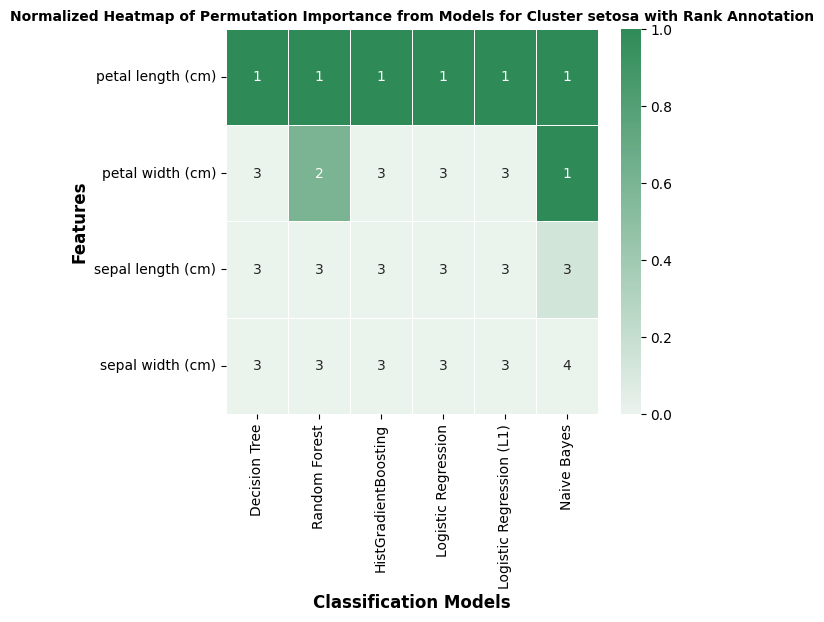

Plotting heatmap for segment versicolor


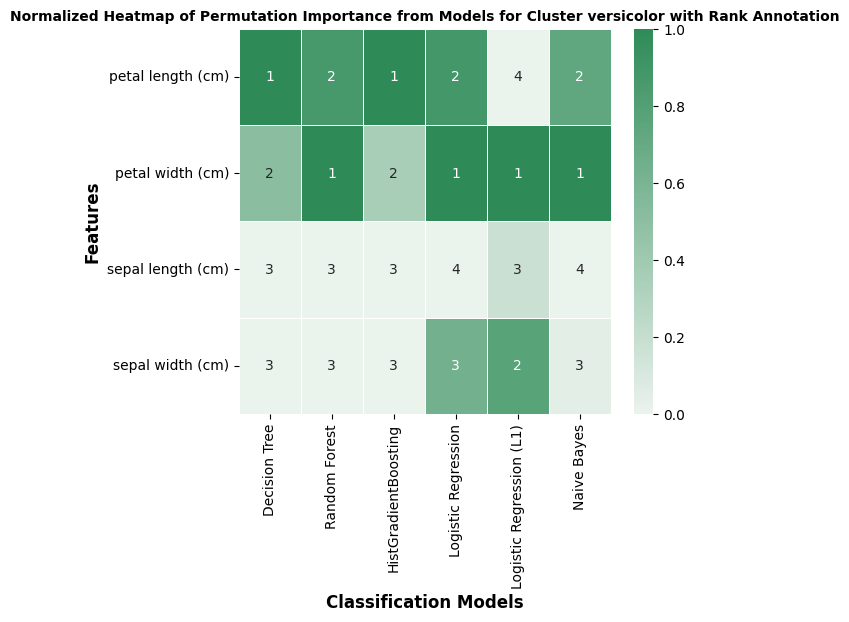

Plotting heatmap for segment virginica


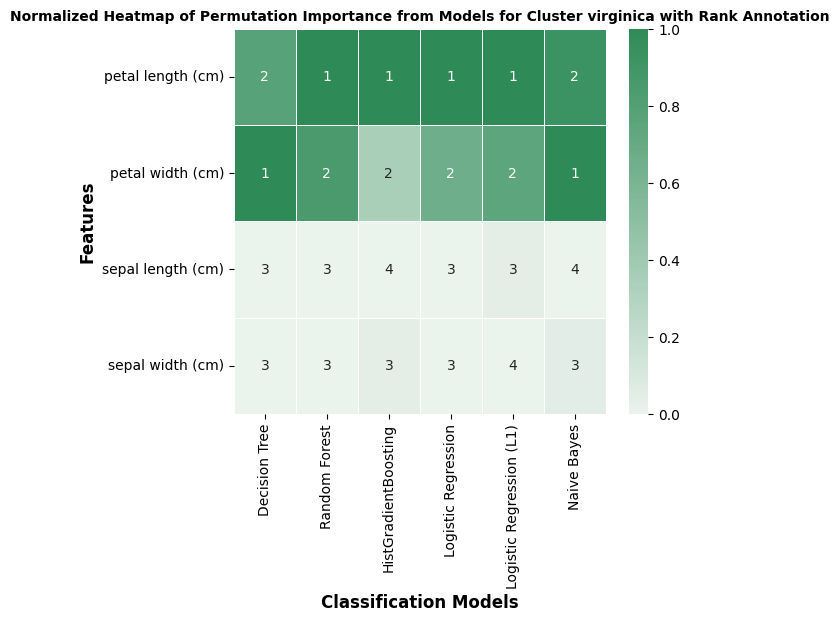

Execution time for plot_heatmap_imp_all_binary_class: 0.7003 seconds


In [23]:
plot_heatmap_imp_all_binary_class(final_imp,
                                  compare_type='Normalized')

In [24]:
final_pvt_imp_score

,Feature,1,2,3,4,Segment
0,petal length (cm),6,0,0,0,setosa
1,petal width (cm),1,5,0,0,setosa
2,sepal length (cm),0,5,1,0,setosa
3,sepal width (cm),0,4,2,0,setosa
4,petal length (cm),2,3,0,1,versicolor
5,petal width (cm),4,2,0,0,versicolor
6,sepal length (cm),0,0,4,2,versicolor
7,sepal width (cm),0,1,5,0,versicolor
8,petal length (cm),4,2,0,0,virginica
9,petal width (cm),2,4,0,0,virginica


##### plot vote

Plotting heatmap for segment setosa


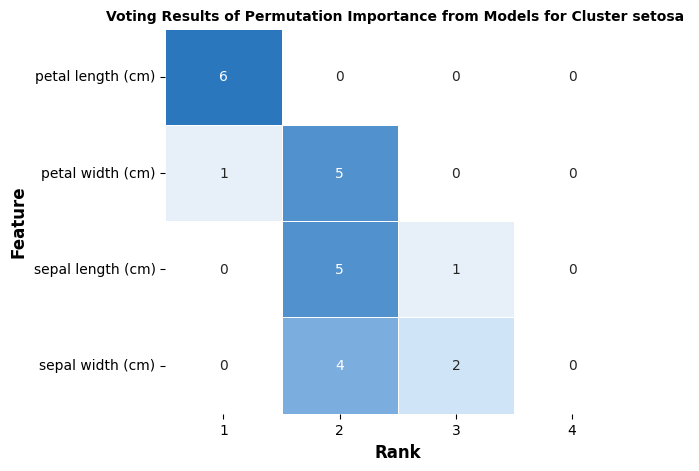

Plotting heatmap for segment versicolor


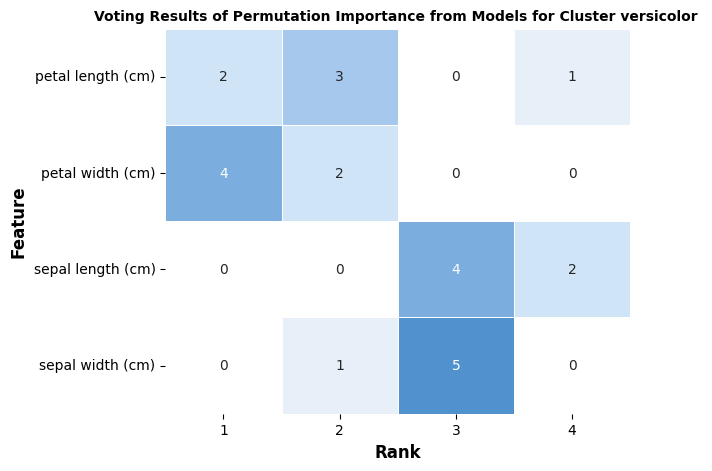

Plotting heatmap for segment virginica


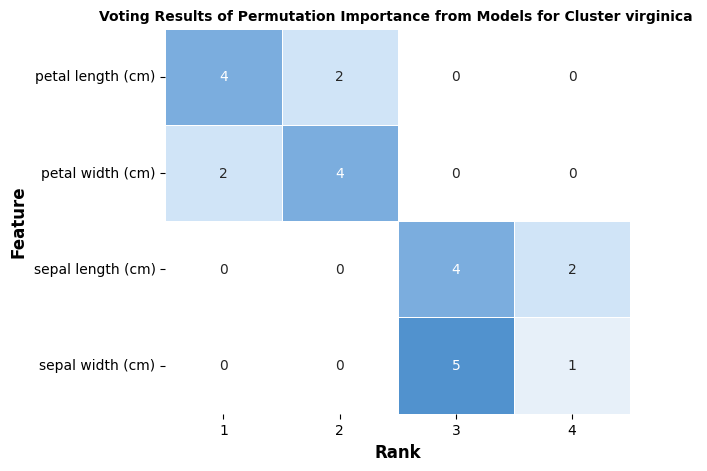

Execution time for plot_vote_result_all_binary_class: 0.3796 seconds


In [25]:
plot_vote_result_all_binary_class(final_pvt_imp_score=final_pvt_imp_score)

##### get intersect feature

In [27]:
lean_feature_list,_ = filter_thres_features(final_pvt_imp_score= final_pvt_imp_score, thres_score=3)
lean_feature_list

Total features from raw : 4
Total features remaining after lean from vote results: 4
Execution time for filter_thres_features: 0.0026 seconds


['petal length (cm)',
 'sepal length (cm)',
 'sepal width (cm)',
 'petal width (cm)']

In [28]:
lean_feature_cluster_dict,union_lean_feature_list, _ = filter_thres_features_by_cluster(final_pvt_imp_score=final_pvt_imp_score, 
                              thres_score=3 )

Cluster setosa:
  Total features from raw: 4
  Total features remaining after lean from vote results: 4
Cluster versicolor:
  Total features from raw: 4
  Total features remaining after lean from vote results: 4
Cluster virginica:
  Total features from raw: 4
  Total features remaining after lean from vote results: 4

Union across all clusters:
  Total union features: 4
Execution time for filter_thres_features_by_cluster: 0.0069 seconds


In [31]:
lean_feature_cluster_dict['setosa']['lean_feature_list']

['petal length (cm)',
 'petal width (cm)',
 'sepal length (cm)',
 'sepal width (cm)']

In [32]:
from post_analysis_clustering.test_chisquare import *

In [38]:
bin_df = bin_features(df=df_iris, features=union_lean_feature_list)
bin_df

Execution time for bin_features: 0.0093 seconds


,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name,petal length (cm)_bin,petal width (cm)_bin,sepal length (cm)_bin,sepal width (cm)_bin
0,0,5.1,3.5,1.4,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(5.02, 5.74]","(3.44, 3.92]"
1,1,4.9,3.0,1.4,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(2.96, 3.44]"
2,2,4.7,3.2,1.3,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(2.96, 3.44]"
3,3,4.6,3.1,1.5,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(2.96, 3.44]"
4,4,5.0,3.6,1.4,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(3.44, 3.92]"
...,...,...,...,...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2,virginica,"(4.54, 5.72]","(2.02, 2.5]","(6.46, 7.18]","(2.96, 3.44]"
146,146,6.3,2.5,5.0,1.9,2,virginica,"(4.54, 5.72]","(1.54, 2.02]","(5.74, 6.46]","(2.48, 2.96]"
147,147,6.5,3.0,5.2,2.0,2,virginica,"(4.54, 5.72]","(1.54, 2.02]","(6.46, 7.18]","(2.96, 3.44]"
148,148,6.2,3.4,5.4,2.3,2,virginica,"(4.54, 5.72]","(2.02, 2.5]","(5.74, 6.46]","(2.96, 3.44]"


In [39]:
bin_df['sepal length (cm)_bin'].value_counts()

sepal length (cm)_bin
(5.74, 6.46]                  42
(5.02, 5.74]                  41
(4.2989999999999995, 5.02]    32
(6.46, 7.18]                  24
(7.18, 7.9]                   11
Name: count, dtype: int64

In [40]:
bin_df = bin_features_neg_zero_pos(df=df_iris, features=union_lean_feature_list)
bin_df

Execution time for bin_features_neg_zero_pos: 0.0198 seconds


,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name,petal length (cm)_bin,petal width (cm)_bin,sepal length (cm)_bin,sepal width (cm)_bin
0,0,5.1,3.5,1.4,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(5.02, 5.74]","(3.44, 3.92]"
1,1,4.9,3.0,1.4,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(2.96, 3.44]"
2,2,4.7,3.2,1.3,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(2.96, 3.44]"
3,3,4.6,3.1,1.5,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(2.96, 3.44]"
4,4,5.0,3.6,1.4,0.2,0,setosa,"(0.999, 2.18]","(0.099, 0.58]","(4.2989999999999995, 5.02]","(3.44, 3.92]"
...,...,...,...,...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2,virginica,"(4.54, 5.72]","(2.02, 2.5]","(6.46, 7.18]","(2.96, 3.44]"
146,146,6.3,2.5,5.0,1.9,2,virginica,"(4.54, 5.72]","(1.54, 2.02]","(5.74, 6.46]","(2.48, 2.96]"
147,147,6.5,3.0,5.2,2.0,2,virginica,"(4.54, 5.72]","(1.54, 2.02]","(6.46, 7.18]","(2.96, 3.44]"
148,148,6.2,3.4,5.4,2.3,2,virginica,"(4.54, 5.72]","(2.02, 2.5]","(5.74, 6.46]","(2.96, 3.44]"


In [41]:
bin_df['sepal length (cm)_bin'].value_counts()

/tmp/ipykernel_23224/2086817302.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  bin_df['sepal length (cm)_bin'].value_counts()


sepal length (cm)_bin
(5.74, 6.46]                  42
(5.02, 5.74]                  41
(4.2989999999999995, 5.02]    32
(6.46, 7.18]                  24
(7.18, 7.9]                   11
Name: count, dtype: int64

In [42]:
pval_df = test_chi_square_segment_vs_rest(df=df_iris, 
                                          features=union_lean_feature_list,
                                          target_cluster='species_name', 
                                          binary_target_prefix="is_cluster_",
                                          n_bins=5,
                                          bin_type= 'handle_neg_zero_pos'
                                         )

Execution time for prep_binary_class: 0.0020 seconds
Execution time for bin_features_neg_zero_pos: 0.0182 seconds
List of binary class columns : ['is_cluster_setosa', 'is_cluster_versicolor', 'is_cluster_virginica']
List of binned features : ['petal length (cm)_bin', 'petal width (cm)_bin', 'sepal length (cm)_bin', 'sepal width (cm)_bin']
Execution time for test_chi_square_segment_vs_rest: 0.0829 seconds


In [43]:
pval_df

,setosa,versicolor,virginica
petal length (cm)_bin,2.035764e-31,4.955872e-21,4.955872e-21
petal width (cm)_bin,1.420189e-30,6.460196e-24,9.324210e-25
sepal length (cm)_bin,2.780293e-17,5.294900e-04,3.252240e-13
sepal width (cm)_bin,8.947062e-12,2.608708e-07,2.437081e-02


In [44]:
pval_df.index

Index(['petal length (cm)_bin', 'petal width (cm)_bin',
       'sepal length (cm)_bin', 'sepal width (cm)_bin'],
      dtype='object')

In [84]:
interpret_pvalues(pval_df, alpha=0.05)


Chi-Square Significance Test Results (alpha = 0.05 )
H0: Feature distribution in this segment is the same as the rest
H1: Feature distribution in this segment is different from the rest

Execution time for interpret_pvalues: 0.0011 seconds


,setosa,versicolor,virginica
petal length (cm)_bin,Significant (Reject H0),Significant (Reject H0),Significant (Reject H0)
petal width (cm)_bin,Significant (Reject H0),Significant (Reject H0),Significant (Reject H0)
sepal length (cm)_bin,Significant (Reject H0),Significant (Reject H0),Significant (Reject H0)
sepal width (cm)_bin,Significant (Reject H0),Significant (Reject H0),Significant (Reject H0)


In [46]:
logworth_df = calculate_logworth_scores(pval_df, min_valid_p=1e-300)
logworth_df


LogWorth scores calculated. Higher values = more significant.
Execution time for calculate_logworth_scores: 0.0017 seconds


,setosa,versicolor,virginica
petal length (cm)_bin,30.6913,20.3049,20.3049
petal width (cm)_bin,29.8477,23.1898,24.0304
sepal length (cm)_bin,16.5559,3.2761,12.4878
sepal width (cm)_bin,11.0483,6.5836,1.6131


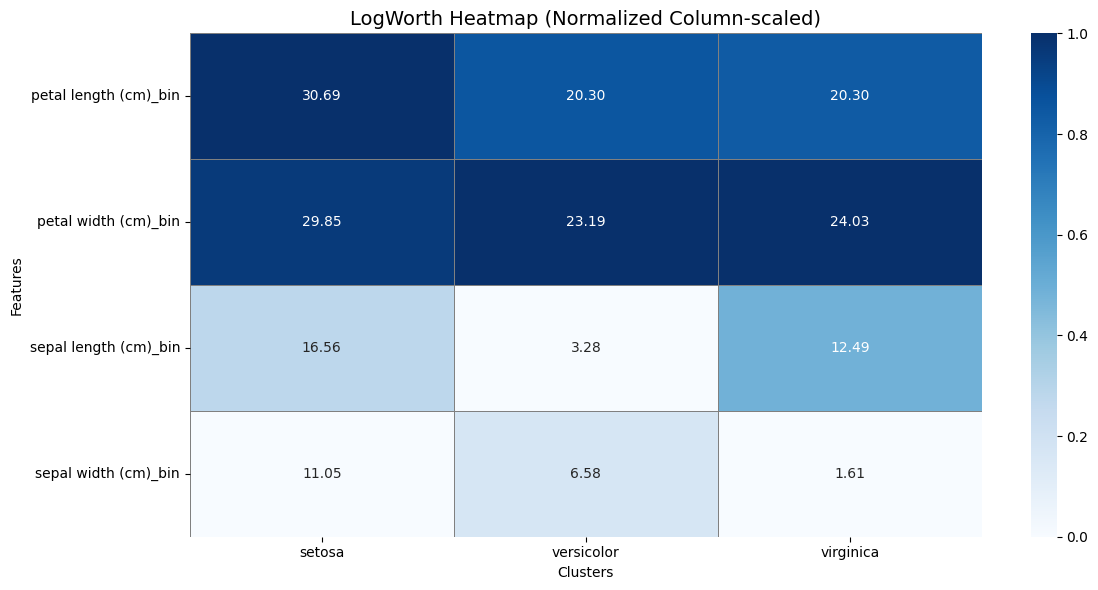

Execution time for plot_heatmap_logworth_colscaled: 0.3887 seconds


In [47]:
plot_heatmap_logworth_colscaled(logworth_df,compare_type='Normalized')

In [48]:
sig_dict, sig_union, sig_union_scaled = get_significant_features_by_pval(pval_df, alpha=0.05)

Total lean features from prior process: 4
------Result after perform chi-square test------
Cluster setosa:
  Total significant features: 4
Cluster versicolor:
  Total significant features: 4
Cluster virginica:
  Total significant features: 4

Union across all clusters:
  Total union features: 4
Execution time for get_significant_features_by_pval: 0.0017 seconds


In [49]:
sig_dict, sig_union, sig_union_scaled =get_significant_features_by_logworth(logworth_df, thres_logworth=3)

Total lean features from prior process: 4
------Result after perform chi-square test------
Cluster setosa:
  Total significant features: 4
Cluster versicolor:
  Total significant features: 4
Cluster virginica:
  Total significant features: 3

Union across all clusters:
  Total union features: 4
Execution time for get_significant_features_by_logworth: 0.0016 seconds


In [51]:
from post_analysis_clustering.plot_vis_cluster import *

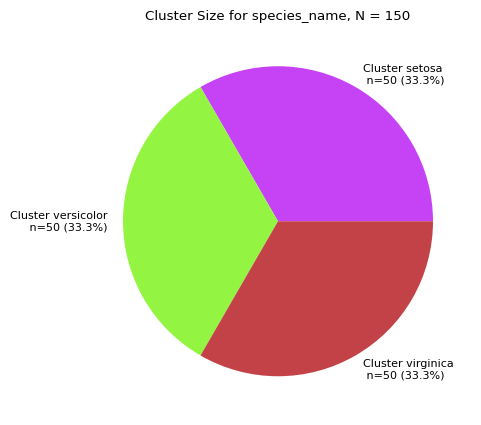

Execution time for plot_pie_cluster: 0.0644 seconds


In [55]:
plot_pie_cluster(df_in = df_iris,
                target_cluster = 'species_name'
                )

#### Describe

In [71]:
get_descriptive_stats(raw_df = df_iris, 
                      features = union_lean_feature_list,
                      target_cluster='species_name', 
                      filter_col_keywords = None)


📊 Descriptive Statistics for petal length (cm):
 species_name  setosa  versicolor  virginica
count          50.00       50.00      50.00
mean            1.46        4.26       5.55
std             0.17        0.47       0.55
min             1.00        3.00       4.50
25%             1.40        4.00       5.10
50%             1.50        4.35       5.55
75%             1.58        4.60       5.88
max             1.90        5.10       6.90

📊 Descriptive Statistics for petal width (cm):
 species_name  setosa  versicolor  virginica
count          50.00       50.00      50.00
mean            0.25        1.33       2.03
std             0.11        0.20       0.27
min             0.10        1.00       1.40
25%             0.20        1.20       1.80
50%             0.20        1.30       2.00
75%             0.30        1.50       2.30
max             0.60        1.80       2.50

📊 Descriptive Statistics for sepal length (cm):
 species_name  setosa  versicolor  virginica
count          

#### Violin & Box

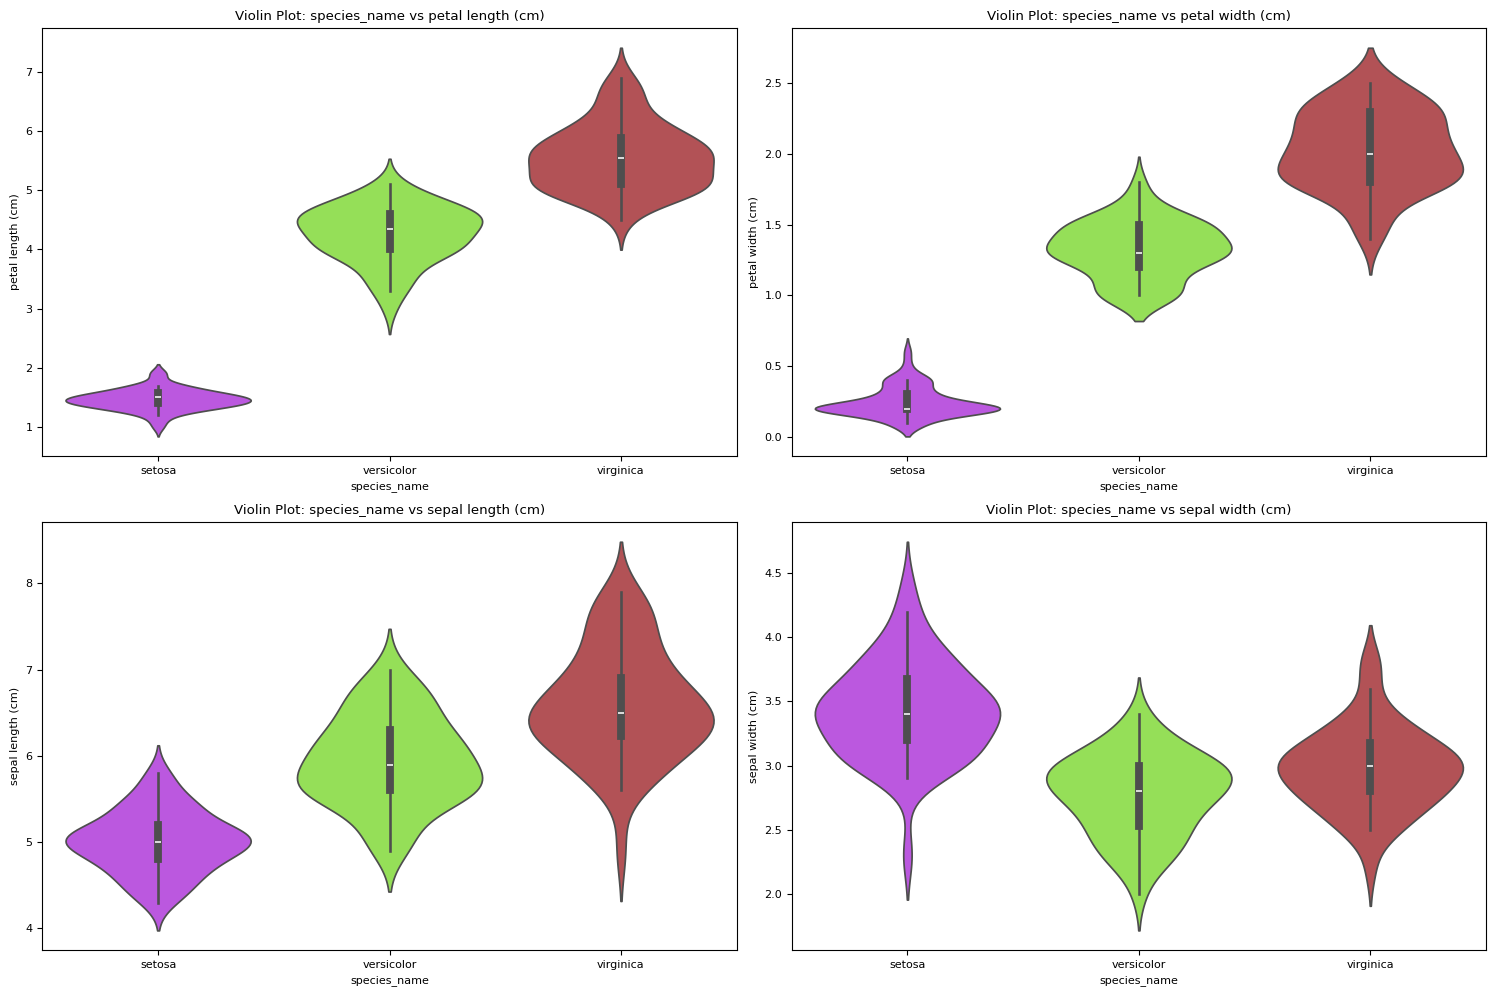

Execution time for plot_violin: 0.8012 seconds


In [72]:
plot_violin(raw_df = df_iris, 
            features = union_lean_feature_list,
            target_cluster='species_name', 
            filter_col_keywords = None
           )

#### Heatmap of Freq

##### discrete

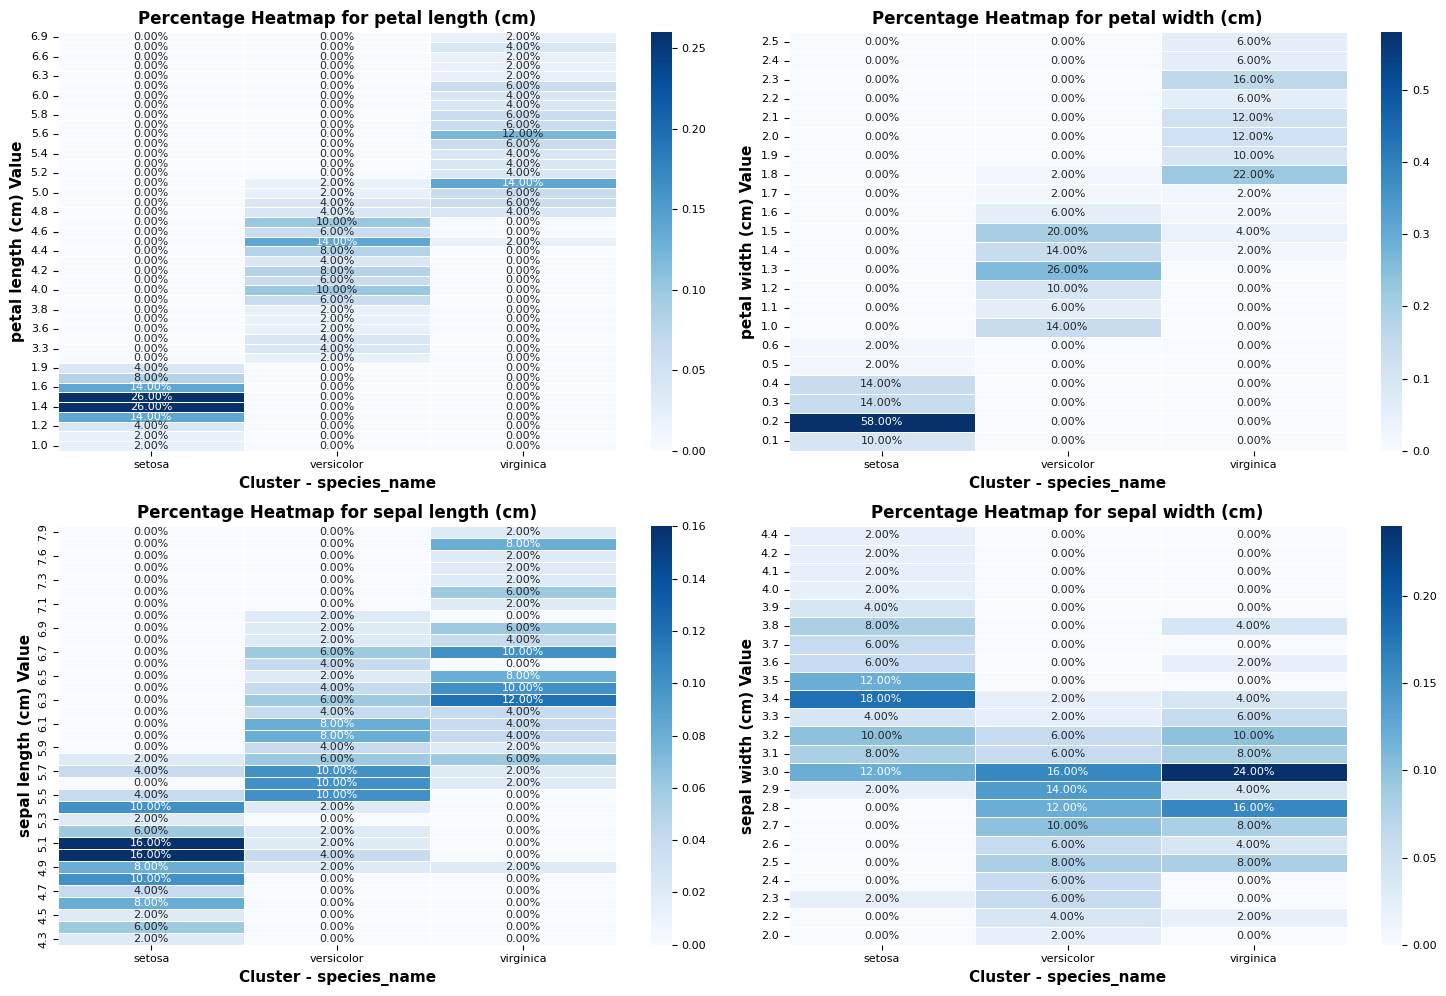

Execution time for plot_crosstab: 2.5311 seconds


In [73]:
plot_crosstab(raw_df = df_iris, 
              features = union_lean_feature_list,
              target_cluster='species_name', 
              filter_col_keywords = None,
              compare_type='Percentage',
              annot_type='Percentage') # nunique น้อยๆ พวก count ได้

##### continuous -bin

Execution time for prep_bin_heatmap: 0.0100 seconds
Execution time for prep_bin_heatmap: 0.0091 seconds
Execution time for prep_bin_heatmap: 0.0091 seconds
Execution time for prep_bin_heatmap: 0.0092 seconds


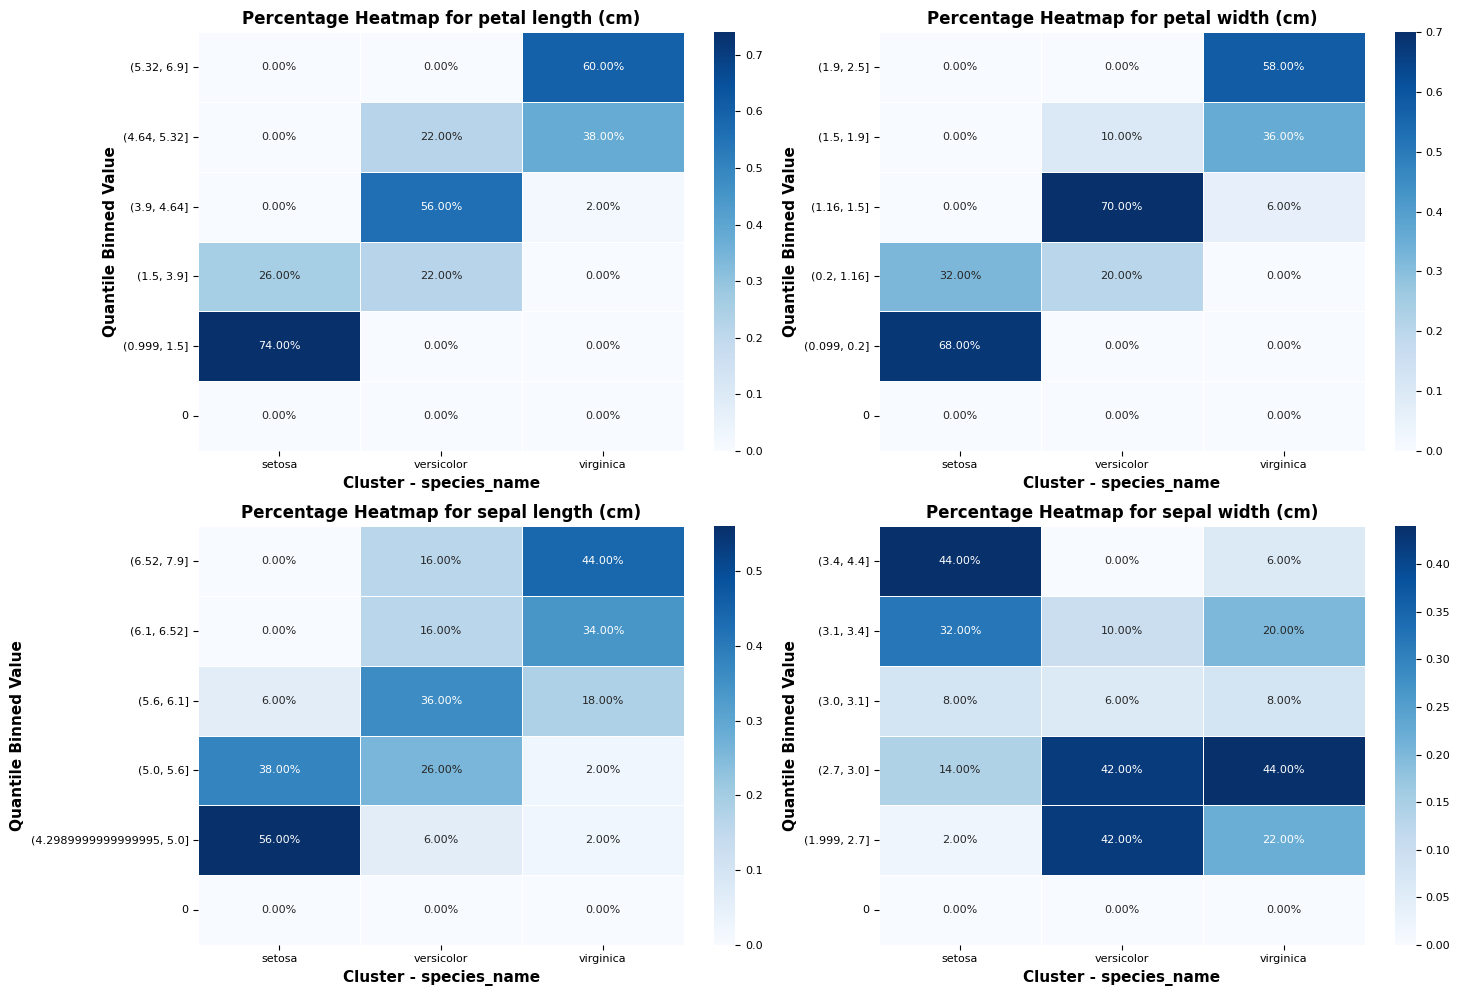

Execution time for plot_bin_heatmap: 1.3302 seconds


In [81]:
plot_bin_heatmap(raw_df = df_iris, 
                  features = union_lean_feature_list,
                  target_cluster='species_name', 
                  filter_col_keywords = None,
                  annot_type='Percentage'
                )

Execution time for prep_bin_heatmap: 0.0089 seconds
Execution time for prep_bin_heatmap: 0.0092 seconds
Execution time for prep_bin_heatmap: 0.0090 seconds
Execution time for prep_bin_heatmap: 0.0087 seconds


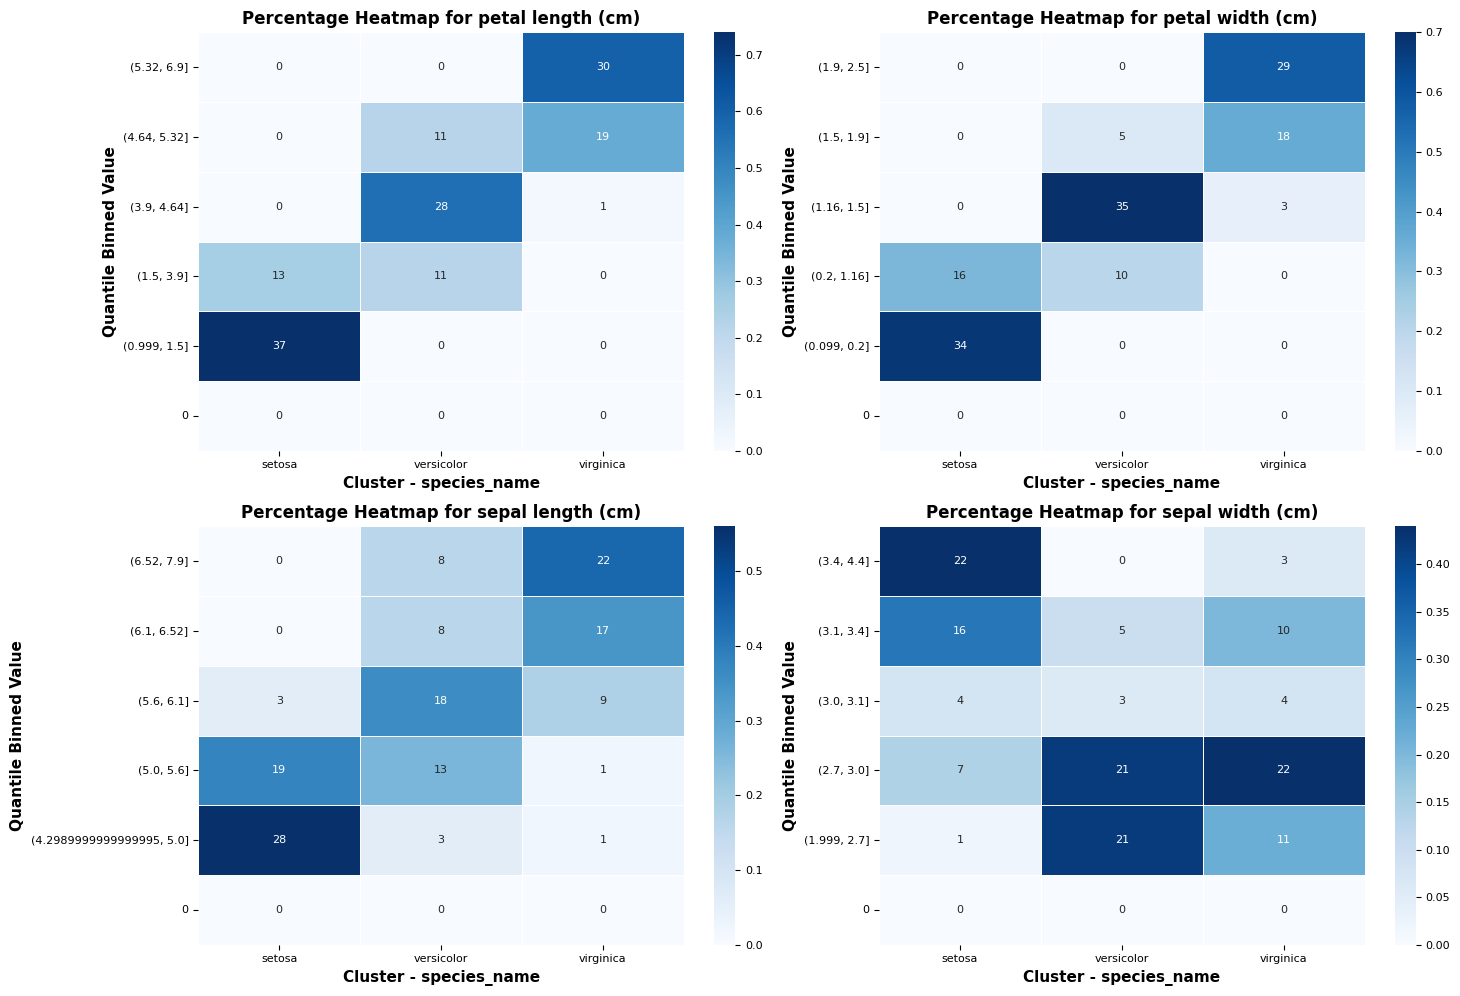

Execution time for plot_bin_heatmap: 1.4627 seconds


In [82]:
plot_bin_heatmap(raw_df = df_iris, 
              features = union_lean_feature_list,
              target_cluster='species_name', 
              filter_col_keywords = None,
                 annot_type='Actual'
                )

#### Snake

https://medium.com/data-science/customer-segmentation-in-online-retail-1fc707a6f9e6

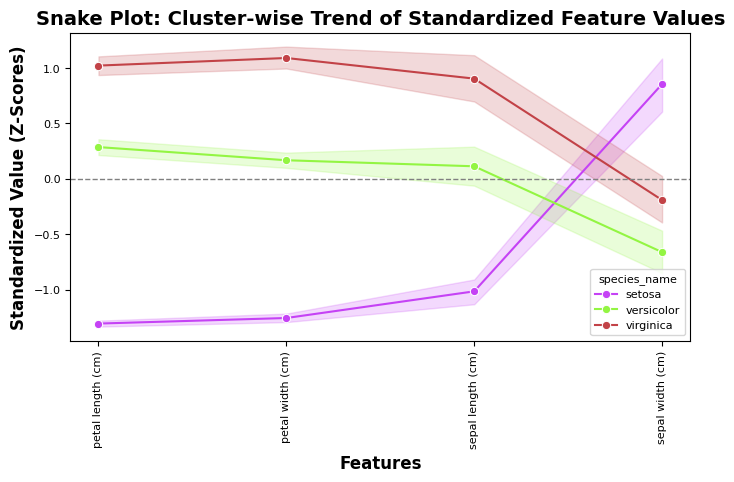

Execution time for plot_snake_scaled: 0.4108 seconds


In [77]:
plot_snake_scaled(raw_df = df_iris, 
                  features = union_lean_feature_list,
                  target_cluster='species_name',
                  primary_key='id', 
                  filter_col_keywords=None)

#### Relative Imp

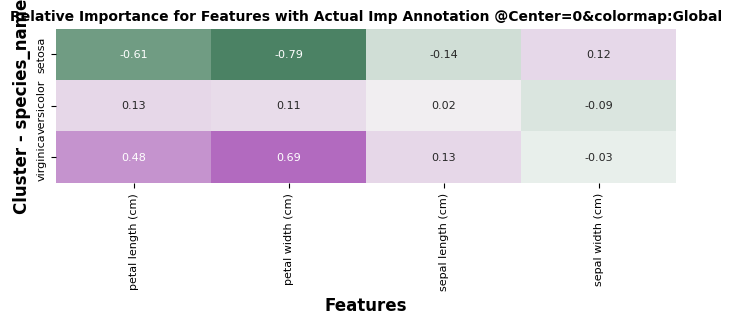

Execution time for plot_relative_imp: 0.1400 seconds


In [78]:
plot_relative_imp(raw_df = df_iris, 
                  features = union_lean_feature_list,
                  target_cluster='species_name', 
                  filter_col_keywords=None,
                  compare_type='Global')

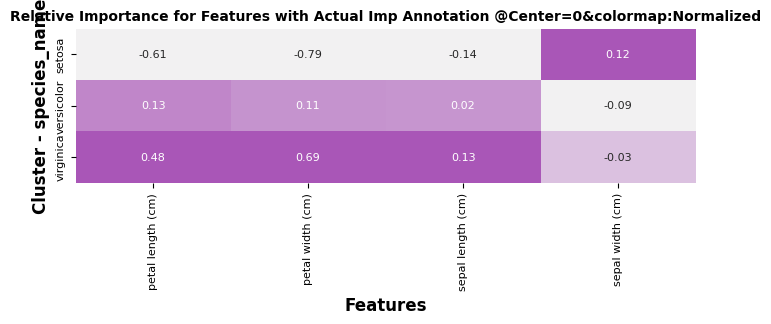

Execution time for plot_relative_imp: 0.1340 seconds


In [79]:
plot_relative_imp(raw_df = df_iris, 
                  features = union_lean_feature_list,
                  target_cluster='species_name', 
                  filter_col_keywords=None,
                  compare_type='Normalized')